# SANS simulations

Choosing an experimental reference frame with the beam incoming aligned and polarised along the $z$ direction, the non-polarised SANS cross section is 
\begin{equation} \label{eq:C7:SANS}
    \frac{d\Sigma}{d\Omega} \propto \left\lVert \widetilde{M}_x \right\rVert + \left\lVert \widetilde{M}_y \right\rVert .
\end{equation}

### Importing Packages

In [1]:
%matplotlib notebook
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import random
import matplotlib.pyplot as plt

### Magnetisation data

Load from file simulation that David performed.

<IPython.core.display.Javascript object>


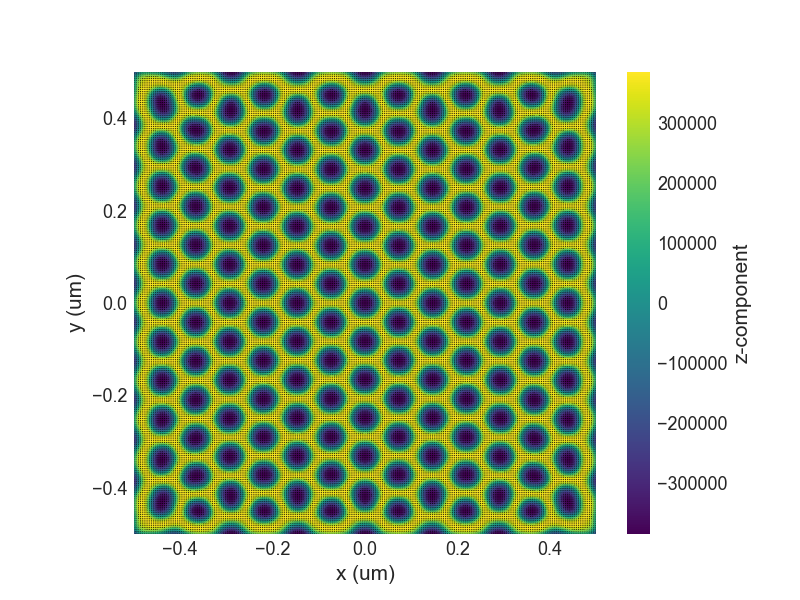

In [6]:
system = mm.System(name='SkL')

system.m = df.Field.fromfile(r"m_Bz150mT-Oxs_MinDriver-Magnetization-00-0003705.omf")
system.m.plane('z').mpl()

### Projection

The SANS simulations work with a 2D array of projected magnetisation. For example, if the neutron beam was incident in the $z$ direction. 

Find the sum of magnetisation through the specimen thickness

In [9]:
p_mx = np.sum(np.transpose((system.m.x.array[:,:,:,0]), (1,0,2)), axis=2)
p_my = np.sum(np.transpose((system.m.y.array[:,:,:,0]), (1,0,2)), axis=2)
p_mz = np.sum(np.transpose((system.m.z.array[:,:,:,0]), (1,0,2)), axis=2)

## FT

In [12]:
system.m.mesh.cell[0]

4e-09

In [13]:
ft_mx = np.fft.fftshift(np.fft.fft2(p_mx, axes=(-2, -1)))
ft_my = np.fft.fftshift(np.fft.fft2(p_my, axes=(-2, -1)))
ft_mz = np.fft.fftshift(np.fft.fft2(p_mz, axes=(-2, -1)))
FreqCompRows =  np.fft.fftshift(np.fft.fftfreq(ft_mx.shape[0],d=system.m.mesh.cell[0])).real
FreqCompCols =  np.fft.fftshift(np.fft.fftfreq(ft_mx.shape[0],d=system.m.mesh.cell[1])).real

\begin{equation} \label{eq:C7:SANS}
    \frac{d\Sigma}{d\Omega} \propto \left\lVert \widetilde{M}_x \right\rVert + \left\lVert \widetilde{M}_y \right\rVert .
\end{equation}

In [14]:
sans = ft_mx*np.conjugate(ft_mx) + ft_my*np.conjugate(ft_my)

## Plot image

<IPython.core.display.Javascript object>


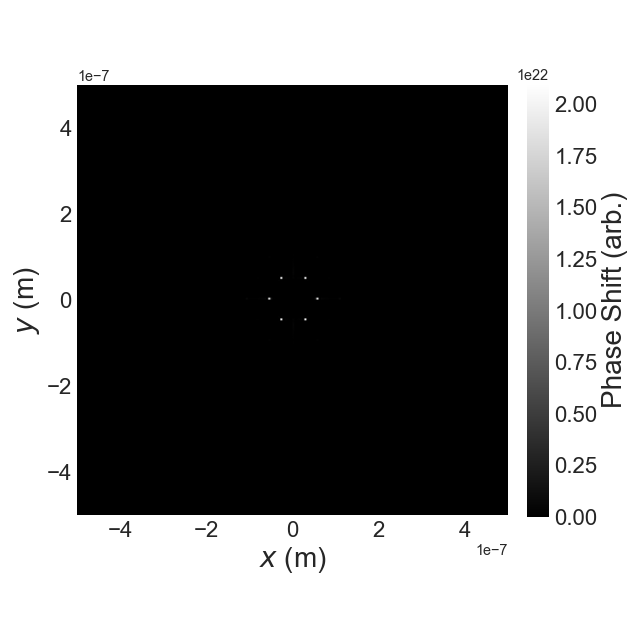

In [19]:
plt.figure(figsize=(8, 8), dpi=80)
imgplot1 = plt.imshow(sans.real,origin='lower', extent=[system.m.mesh.region.pmin[0], system.m.mesh.region.pmax[0], system.m.mesh.region.pmin[1], system.m.mesh.region.pmax[1]], cmap='gray', interpolation='spline16')
# draw the ellipse
cbar1 = plt.colorbar(imgplot1, fraction=0.046, pad=0.04)
plt.xlabel("$k_x$ (m$^{-1}$)", fontsize=25)
plt.ylabel("$k_y$ (m$^{-1}$)", fontsize=25)
plt.tick_params(labelsize=20)
cbar_lab = cbar1.ax.set_ylabel(r'Intensity (arb.)', fontsize=25)
cbar1.ax.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

SANS can have other geometries and polarisation of neutrons that I am planning to add. I just need to get my head around the differnt geometries.